In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Import and store the data in a dataframe. (2.5 points)

In [3]:
data_set = pd.read_fwf("airq402.dat.txt", header = None) #table of fixed-width formatted (fwf) lines into DataFrame.

In [4]:
data_set.columns = ["City1", "City2","Avg_Fare", "Distance", "Avg_weekly_passengers", "Mrkt_leading_airline", "Mrkt_share", 
"Avg_fare", "Low_price_airline", "Mrkt_share1", "Price"]

In [5]:
data_set.head()

,City1,City2,Avg_Fare,Distance,Avg_weekly_passengers,Mrkt_leading_airline,Mrkt_share,Avg_fare,Low_price_airline,Mrkt_share1,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


## 2. Remove the outliers from the data (5 points)

In [6]:
Q1 = data_set.quantile(q=0.25) # for finding 25 percentile
Q3 = data_set.quantile(q=0.75)  # for finding 75 percentile
IQR = Q3 - Q1 # calculating Inter quartile range
print(IQR)

Avg_Fare                  71.4175
Distance                 899.0000
Avg_weekly_passengers    512.7150
Mrkt_share                27.0000
Avg_fare                  78.8925
Mrkt_share1               39.7775
Price                     54.7625
dtype: float64


In [7]:
# finding outliers for each column

High = Q3 + 1.5*IQR
Low = Q1 - 1.5*IQR
print("High for each column is:\n\n", High)
print("\nLow for each column is:\n\n", Low)

High for each column is:

 Avg_Fare                  304.51875
Distance                 2801.00000
Avg_weekly_passengers    1538.98500
Mrkt_share                114.01000
Avg_fare                  321.31625
Mrkt_share1               112.63875
Price                     250.67375
dtype: float64

Low for each column is:

 Avg_Fare                  18.84875
Distance                -795.00000
Avg_weekly_passengers   -511.87500
Mrkt_share                 6.01000
Avg_fare                   5.74625
Mrkt_share1              -46.47125
Price                     31.62375
dtype: float64


In [8]:
new_data_set = data_set[~((data_set<Low)|(data_set>High)).any(axis=1)] # removing ouliers from the data set

In [9]:
new_data_set.shape

(885, 11)

In [10]:
new_data_set.head()

,City1,City2,Avg_Fare,Distance,Avg_weekly_passengers,Mrkt_leading_airline,Mrkt_share,Avg_fare,Low_price_airline,Mrkt_share1,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


## 3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [11]:
new_data_set.head()

,City1,City2,Avg_Fare,Distance,Avg_weekly_passengers,Mrkt_leading_airline,Mrkt_share,Avg_fare,Low_price_airline,Mrkt_share1,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [12]:
y = new_data_set["Avg_Fare"] #target variable
x = new_data_set.drop("Avg_Fare", axis =1)  # independent variable

## 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [13]:
# converting object type columns to categorial type 
new_data_set["City1"] = new_data_set.City1.astype("category").cat.codes
new_data_set["City2"] = new_data_set.City2.astype("category").cat.codes
new_data_set["Mrkt_leading_airline"] = new_data_set.Mrkt_leading_airline.astype("category").cat.codes
new_data_set["Low_price_airline"] = new_data_set.Low_price_airline.astype("category").cat.codes

In [14]:
# finding correlation 
data_corr = new_data_set.corr()
data_corr

,City1,City2,Avg_Fare,Distance,Avg_weekly_passengers,Mrkt_leading_airline,Mrkt_share,Avg_fare,Low_price_airline,Mrkt_share1,Price
City1,1.000000,0.307054,-0.092398,0.030485,0.013192,0.043640,-0.068297,-0.112980,0.040329,0.095783,-0.028719
City2,0.307054,1.000000,-0.029294,0.150499,-0.037372,-0.013822,-0.080962,-0.039302,0.015930,0.045622,0.036378
Avg_Fare,-0.092398,-0.029294,1.000000,0.522650,-0.197005,-0.321035,-0.207955,0.979713,-0.173631,-0.493555,0.840993
Distance,0.030485,0.150499,0.522650,1.000000,-0.129632,-0.139442,-0.547952,0.489721,-0.190593,-0.361519,0.539894
Avg_weekly_passengers,0.013192,-0.037372,-0.197005,-0.129632,1.000000,-0.024811,0.021769,-0.163736,0.074021,0.076176,-0.209018
Mrkt_leading_airline,0.043640,-0.013822,-0.321035,-0.139442,-0.024811,1.000000,0.105175,-0.301472,0.269987,0.161220,-0.298722
Mrkt_share,-0.068297,-0.080962,-0.207955,-0.547952,0.021769,0.105175,1.000000,-0.193382,0.142791,0.281182,-0.314555
Avg_fare,-0.112980,-0.039302,0.979713,0.489721,-0.163736,-0.301472,-0.193382,1.000000,-0.161748,-0.519442,0.794157
Low_price_airline,0.040329,0.015930,-0.173631,-0.190593,0.074021,0.269987,0.142791,-0.161748,1.000000,0.202628,-0.221146
Mrkt_share1,0.095783,0.045622,-0.493555,-0.361519,0.076176,0.161220,0.281182,-0.519442,0.202628,1.000000,-0.260912


In [15]:
x = new_data_set.drop(["City1","City2","Avg_Fare","Avg_weekly_passengers","Mrkt_leading_airline","Mrkt_share","Low_price_airline","Mrkt_share1"], axis=1) 
# dropped independent variables whose correlation is less than 0.1 from dependent variable

In [16]:
x.head()

,Distance,Avg_fare,Price
0,528,111.03,111.03
1,860,123.09,118.94
2,852,223.98,167.12
3,288,68.86,68.86
4,723,161.36,145.42


## 5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

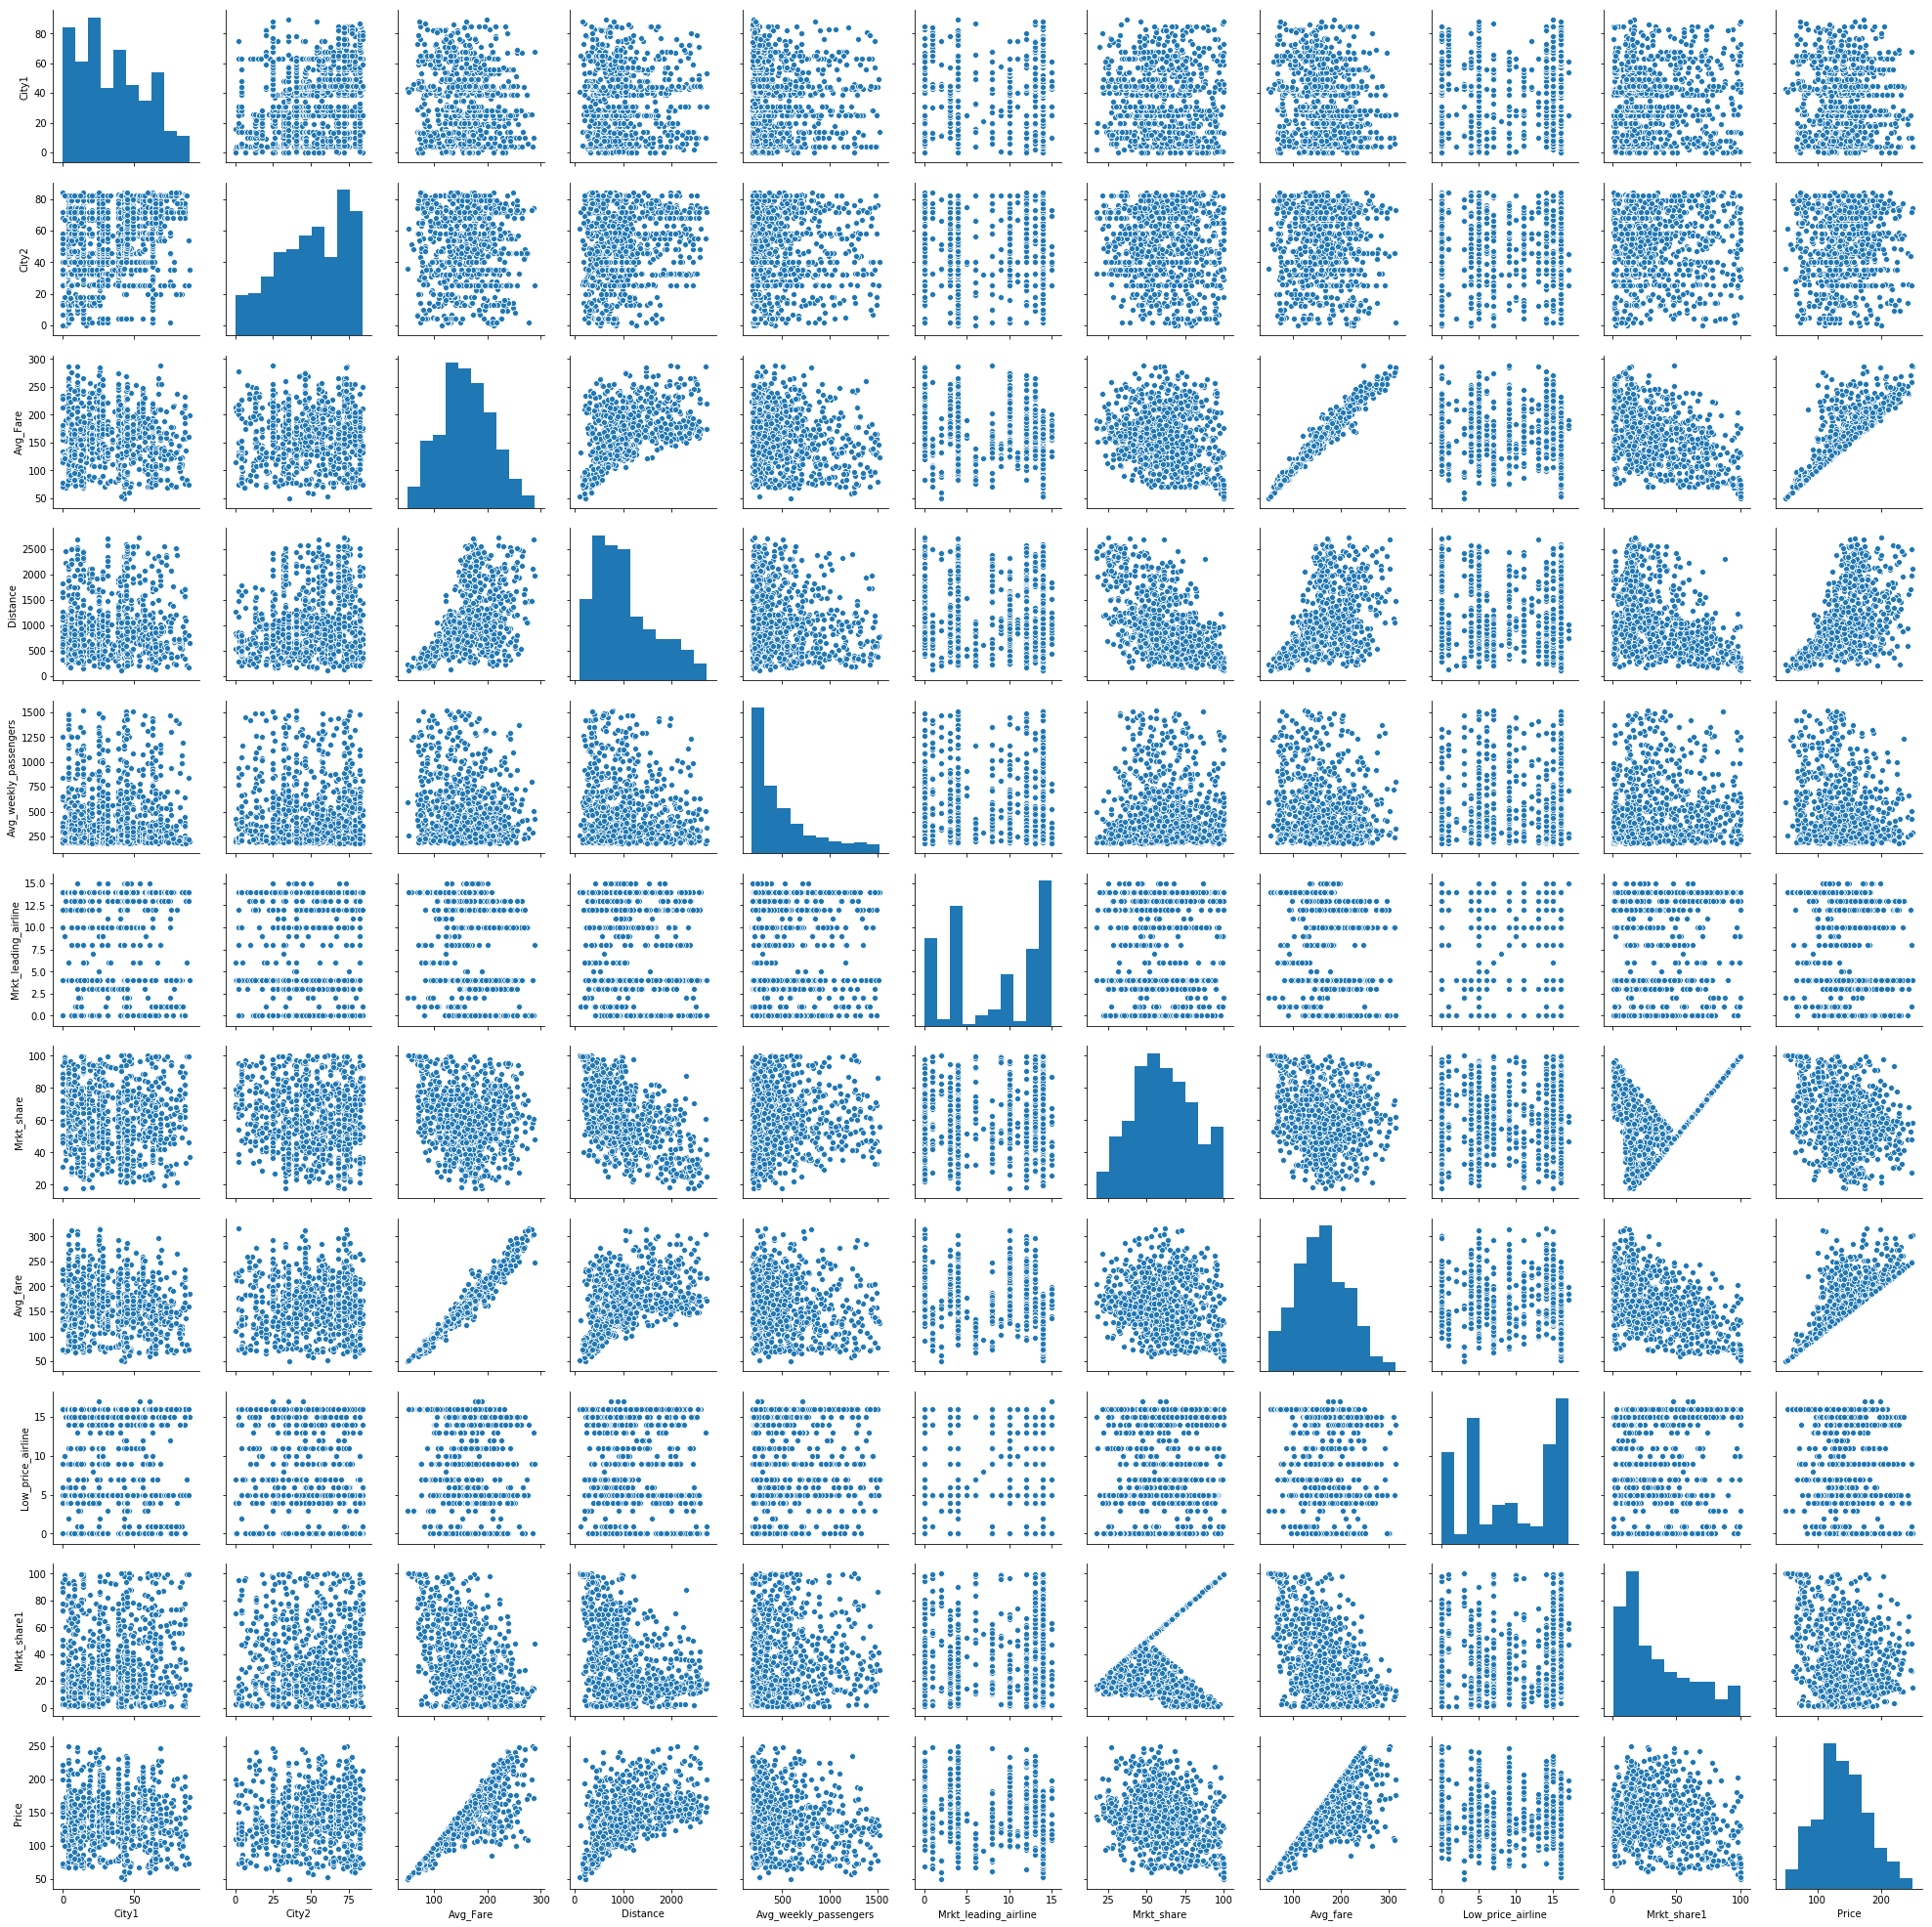

In [17]:
sns.pairplot(new_data_set)

## 6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # Spliting data by 80:20 ratio for train and testing respectively

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train) # applying linear regression model. Since it has multiple variables it can be called as
## multiple linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 7. Print the coefficients & intercepts of the linear regression model (5 points)

In [22]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is: {}".format(col_name, regression_model.coef_[idx]))

The coefficient for Distance is: 0.001659517205772051
The coefficient for Avg_fare is: 0.7725444800109688
The coefficient for Price is: 0.18620357897503603


In [23]:
print("The intercept for our model is:",regression_model.intercept_)

The intercept for our model is: 6.951124660137424


In [24]:
# we can write our model as y = 6.95 + 0.002*X1 + 0.773*X2 + 0.186*X3 (Coeffecients rounded off to three decimal digits)

## 8. Print the accuracy of the overall model (2.5 points)

In [25]:
regression_model.score(x_test,y_test)

0.9759568234435785

In [26]:
# So the model explains 97.6% (round-off) of the variability in y using X

In [27]:
mse = np.mean((regression_model.predict(x_test)-y_test)**2)

In [28]:
import math
math.sqrt(mse)

7.2187425813960155

In [29]:
# so there is avg of 7.2 (roundoff) Avg_Fare difference from real Avg_Fare on an avg

In [30]:
y_pred = regression_model.predict(x_test)

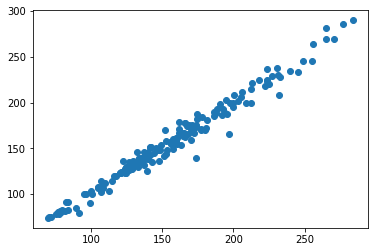

In [31]:
plt.scatter(y_test, y_pred)